In [3]:
import pandas as pd
import numpy as np
from rfpimp import *
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, roc_curve, precision_score, recall_score
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.ensemble.forest module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)


In [378]:
metadata_byday = pd.read_csv('data/metadata_byday.csv')
metadata_byday

,FIPS,STATE,ST_ABBR,COUNTY,2020-03-22_confirmed,2020-03-22_deaths,2020-03-22_recovered,2020-03-22_active,2020-03-23_confirmed,2020-03-23_deaths,...,2020-05-12_recovered,2020-05-12_active,2020-05-13_confirmed,2020-05-13_deaths,2020-05-13_recovered,2020-05-13_active,2020-05-14_confirmed,2020-05-14_deaths,2020-05-14_recovered,2020-05-14_active
0,1001,ALABAMA,AL,Autauga,0,0,0,0,0,0,...,0.0,87.0,93.0,4.0,0.0,89.0,104.0,4.0,0.0,100.0
1,1003,ALABAMA,AL,Baldwin,2,0,0,0,3,0,...,0.0,220.0,231.0,7.0,0.0,224.0,243.0,8.0,0.0,235.0
2,1005,ALABAMA,AL,Barbour,0,0,0,0,0,0,...,0.0,66.0,69.0,1.0,0.0,68.0,74.0,1.0,0.0,73.0
3,1007,ALABAMA,AL,Bibb,0,0,0,0,0,0,...,0.0,45.0,46.0,1.0,0.0,45.0,46.0,1.0,0.0,45.0
4,1009,ALABAMA,AL,Blount,0,0,0,0,0,0,...,0.0,45.0,45.0,0.0,0.0,45.0,45.0,0.0,0.0,45.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3137,56037,WYOMING,WY,Sweetwater,0,0,0,0,0,0,...,0.0,20.0,20.0,0.0,0.0,20.0,21.0,0.0,0.0,21.0
3138,56039,WYOMING,WY,Teton,2,0,0,0,2,0,...,0.0,98.0,99.0,0.0,0.0,99.0,99.0,0.0,0.0,99.0
3139,56041,WYOMING,WY,Uinta,0,0,0,0,0,0,...,0.0,9.0,9.0,0.0,0.0,9.0,9.0,0.0,0.0,9.0
3140,56043,WYOMING,WY,Washakie,0,0,0,0,0,0,...,0.0,8.0,8.0,0.0,0.0,8.0,8.0,0.0,0.0,8.0


In [16]:
state_orders = pd.read_csv('data/state_orders.csv')
state_orders

,FIPS,STATE,date_announced,date_effective,date_lift,date_reopen,order_length,days_since_order,days_since_reopen,ann_to_eff,reopened,days_since_lifted,lifted
0,1001,ALABAMA,2020-04-03,2020-04-04,2020-04-30,2020-04-30,26,40,14,1,1,14,1
1,1003,ALABAMA,2020-04-03,2020-04-04,2020-04-30,2020-04-30,26,40,14,1,1,14,1
2,1005,ALABAMA,2020-04-03,2020-04-04,2020-04-30,2020-04-30,26,40,14,1,1,14,1
3,1007,ALABAMA,2020-04-03,2020-04-04,2020-04-30,2020-04-30,26,40,14,1,1,14,1
4,1009,ALABAMA,2020-04-03,2020-04-04,2020-04-30,2020-04-30,26,40,14,1,1,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3137,56037,WYOMING,2020-05-14,2020-05-14,2020-05-14,2020-05-01,0,0,13,0,1,0,1
3138,56039,WYOMING,2020-05-14,2020-05-14,2020-05-14,2020-05-01,0,0,13,0,1,0,1
3139,56041,WYOMING,2020-05-14,2020-05-14,2020-05-14,2020-05-01,0,0,13,0,1,0,1
3140,56043,WYOMING,2020-05-14,2020-05-14,2020-05-14,2020-05-01,0,0,13,0,1,0,1


In [6]:
sociohealth2 = pd.read_csv('data/sociohealth2.csv')
sociohealth2

,FIPS,Pop_Dens,perc_below_pov,perc_disabled,perc_minority,percent_multiunit_housing,perc_overcrowded,perc_no_vehicle,perc_group_quarters,perc_fair_poor_health,...,uninsured,lim_eng,per_dem,per_gop,perc_afr_am,perc_nat_am_as,perc_asian,perc_nh_opi,perc_hisp,perc_nonhisp_white
0,1001,92.859967,15.4,19.3,25.0,3.8,1.4,5.6,1.0,18,...,8.05,0.80,0.239569,0.734358,19.0,0.5,1.1,0.1,2.7,75.0
1,1003,130.901947,10.6,14.0,17.0,18.3,1.3,3.4,1.4,18,...,11.10,0.65,0.195653,0.773515,9.0,0.8,1.1,0.1,4.4,83.2
2,1005,29.132150,28.9,22.2,53.9,1.3,3.4,9.2,11.2,26,...,12.10,1.55,0.466603,0.522714,47.5,0.6,0.5,0.2,4.2,46.5
3,1007,36.190214,14.0,16.7,25.4,2.4,0.8,6.0,9.3,20,...,9.95,0.35,0.214220,0.769662,21.6,0.4,0.2,0.1,2.5,74.4
4,1009,89.395591,14.4,14.2,12.9,0.9,1.6,4.2,0.9,21,...,12.50,1.80,0.084699,0.898519,1.4,0.6,0.3,0.1,9.1,87.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3137,56037,4.231045,12.0,12.3,20.4,5.5,1.9,2.4,1.3,15,...,12.00,1.85,0.194046,0.729428,1.1,1.5,0.8,0.2,16.1,79.6
3138,56039,5.769301,7.1,7.0,18.4,7.5,7.2,2.4,4.0,12,...,12.50,3.95,0.600608,0.321945,0.6,0.9,1.2,0.1,15.1,81.5
3139,56041,9.899987,12.5,17.2,12.5,5.8,2.8,3.9,1.3,16,...,12.10,1.00,0.149261,0.764187,0.7,1.3,0.6,0.2,9.0,87.5
3140,56043,3.631169,12.4,14.9,18.0,1.1,1.8,5.0,2.0,16,...,16.20,0.50,0.143203,0.783580,0.5,1.7,0.8,0.1,13.9,82.6


In [9]:
sociohealth2.columns

Index(['FIPS', 'Pop_Dens', 'perc_below_pov', 'perc_disabled', 'perc_minority',
       'percent_multiunit_housing', 'perc_overcrowded', 'perc_no_vehicle',
       'perc_group_quarters', 'perc_fair_poor_health', 'perc_smokers',
       'perc_obese', 'perc_phys_inactive', 'prev_hosp_rate_medicare',
       'air_pollution', 'unemployed', 'age_adjusted_mortality', 'perc_diab',
       'perc_insuf_sleep', 'health_costs', 'med_house_income', 'wnw_seg',
       'Population', 'perc_fem', 'perc_rural', 'pcp_rate_100k', '65_older',
       '17_younger', 'uninsured', 'lim_eng', 'per_dem', 'per_gop',
       'perc_afr_am', 'perc_nat_am_as', 'perc_asian', 'perc_nh_opi',
       'perc_hisp', 'perc_nonhisp_white'],
      dtype='object')

In [444]:
X1 = state_orders[['FIPS', 'order_length','days_since_order', 'days_since_reopen', 'reopened', 'lifted']]

In [445]:
X2 = sociohealth2[['FIPS', 'Pop_Dens', '65_older']]

In [446]:
X = pd.merge(X1, X2, how = 'left', on = 'FIPS')

In [447]:
X.drop(columns = 'FIPS', inplace = True)

In [448]:
X['population'] = sociohealth2['Population']

In [449]:
#X['percent_african_american'] = sociohealth2['perc_afr_am']

In [407]:

#X['percent_natamerican_alaskan'] = sociohealth2['perc_nat_am_as']
#X['percent_asian'] = sociohealth2['perc_asian']
#X['percent_hawaiian_pacislander'] = sociohealth2['perc_nh_opi']
#X['percent_hispanic'] = sociohealth2['perc_hisp']
#X['percent_nonhisp_white'] = sociohealth2['perc_nonhisp_white']


In [477]:
X['percent_minority'] = sociohealth2['perc_minority']

In [478]:
X['percent_multiunit_housing'] = sociohealth2['percent_multiunit_housing']

In [497]:
X.drop(columns = ['lifted', 'reopened'],inplace = True)

In [303]:
#X.drop(columns = 'percent_african_american', inplace = True)

In [498]:
X['air_pollution'] = sociohealth2['air_pollution']

In [499]:
#X.drop(columns = 'lifted', inplace = True)

In [500]:
X

,order_length,days_since_order,days_since_reopen,Pop_Dens,65_older,population,percent_african_american,percent_multiunit_housing,air_pollution,percent_minority
0,26,40,14,92.859967,14.65,55416,19.0,3.8,10.8,25.0
1,26,40,14,130.901947,19.60,208563,9.0,18.3,9.6,17.0
2,26,40,14,29.132150,18.00,25965,47.5,1.3,10.1,53.9
3,26,40,14,36.190214,15.85,22643,21.6,2.4,10.5,25.4
4,26,40,14,89.395591,17.90,57704,1.4,0.9,11.3,12.9
...,...,...,...,...,...,...,...,...,...,...
3137,0,0,13,4.231045,10.60,44165,1.1,5.5,7.1,20.4
3138,0,0,13,5.769301,13.55,23191,0.6,7.5,6.3,18.4
3139,0,0,13,9.899987,12.35,20773,0.7,5.8,6.7,12.5
3140,0,0,13,3.631169,20.80,8235,0.5,1.1,6.4,18.0


In [486]:
y = (metadata_byday.iloc[:,-1] > metadata_byday.iloc[:,-5]).astype(int)

In [487]:
y.value_counts()

0    1761
1    1381
dtype: int64

In [501]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [533]:
rfc = RandomForestClassifier(n_estimators = 75, max_features=1, oob_score = True)
rfc.fit(X_train, y_train)

rfc.score(X_test, y_test)

0.772264631043257

Text(0.5, 0, 'Average contribution of information gain')

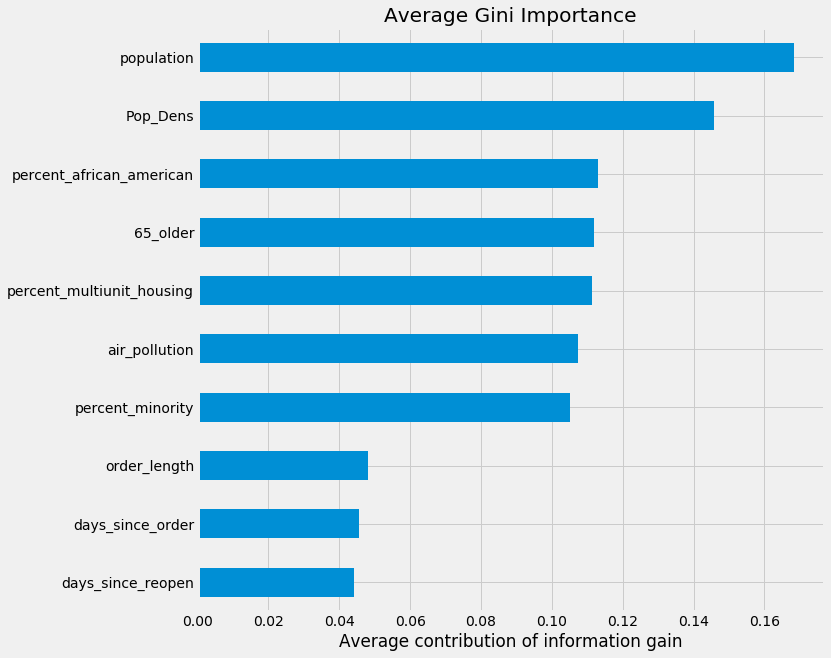

In [534]:
feature_scores = pd.Series(rfc.feature_importances_, index=X.columns)
feature_scores = feature_scores.sort_values()

ax = feature_scores.plot(kind='barh', figsize=(10,10))
ax.set_title('Average Gini Importance')
ax.set_xlabel('Average contribution of information gain')

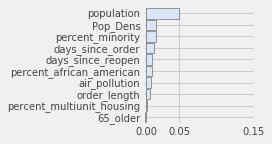

In [535]:
imp = importances(rfc, X_test, y_test, n_samples=-1)
viz = plot_importances(imp)
viz.view()

In [536]:
confusion_matrix(y_test, rfc.predict(X_test))

array([[381,  68],
       [111, 226]])

In [537]:
precision_score(y_test, rfc.predict(X_test))

0.7687074829931972

In [538]:
recall_score(y_test, rfc.predict(X_test))

0.6706231454005934

In [539]:
estimator_list = [50, 75, 100, 125, 150, 250]
score_list = []
for i in estimator_list:
    rfc1 = RandomForestClassifier(n_estimators=i, oob_score=True)
    rfc1.fit(X_train, y_train)
    score_list.append(rfc1.score(X_test, y_test))
estimator_scores = dict(zip(estimator_list, score_list))
estimator_scores

{50: 0.7366412213740458,
 75: 0.7544529262086515,
 100: 0.7480916030534351,
 125: 0.7468193384223919,
 150: 0.7557251908396947,
 250: 0.7480916030534351}

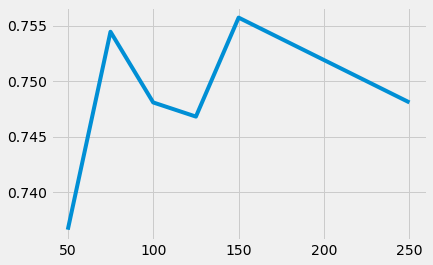

In [540]:
x = estimator_list
y = score_list
fig, ax = plt.subplots()
ax.plot(x,y)

In [541]:
max_features = []
score_list = []
for i in range(1, len(X.columns)):
    rfc2 = RandomForestClassifier(max_features=i, oob_score=True)
    rfc2.fit(X_train, y_train)
    score_list.append(rfc2.score(X_test, y_test))
    max_features.append(i)
feature_scores = dict(zip(max_features, score_list))
feature_scores

{1: 0.7531806615776081,
 2: 0.7480916030534351,
 3: 0.7506361323155216,
 4: 0.7430025445292621,
 5: 0.7379134860050891,
 6: 0.7468193384223919,
 7: 0.7404580152671756,
 8: 0.7480916030534351,
 9: 0.7442748091603053}

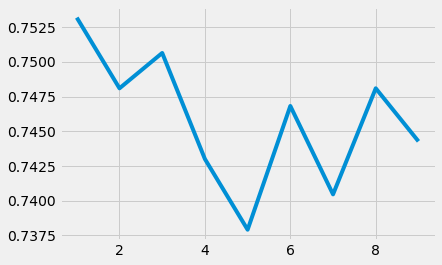

In [542]:
x = max_features
y = score_list
fig, ax = plt.subplots()
ax.plot(x,y)